<a href="https://colab.research.google.com/github/tobnie/gaze_predictor_nn/blob/main/train_nn_subject_specific.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook is the same as the other notebook, but all models are fitted only for the exemplary subject *AL09OL*

Load Package:


In [1]:
!git clone -l -s https://github.com/tobnie/gaze_predictor_nn.git cloned_repo

%cd cloned_repo

Cloning into 'cloned_repo'...
remote: Enumerating objects: 1942, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 1942 (delta 11), reused 12 (delta 7), pack-reused 1922
Receiving objects: 100% (1942/1942), 1.08 GiB | 31.30 MiB/s, done.
Resolving deltas: 100% (336/336), done.
Checking out files: 100% (1189/1189), done.
/content/cloned_repo


In [2]:
!git pull

Already up to date.


General Hyperparameters:

In [3]:
epochs = 100

# FC NN

Configuration for NN:

In [4]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [5]:
from gaze_predictor.fully_connected import FCNetwork

fc_nn = FCNetwork(name='fc_nn', configuration = nn_configuration, subject_specific=True)
fc_nn.create_model()

X shape: (6815, 300)
Created model for fc_nn:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 300)               90300     
                                                                 
 Hidden1 (Dense)             (None, 512)               154112    
                                                                 
 Hidden2 (Dense)             (None, 32)                16416     
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 260,861
Trainable params: 260,861
Non-trainable params: 0
_________________________________________________________________
None


Train Model:

In [6]:
fc_nn.train()

Epoch 1/100
137/137 [==============================] - 5s 6ms/step - loss: 4.9924 - root_mean_squared_error: 2.2344 - val_loss: 3.2886 - val_root_mean_squared_error: 1.8135
Epoch 2/100
137/137 [==============================] - 0s 3ms/step - loss: 2.4111 - root_mean_squared_error: 1.5528 - val_loss: 2.1693 - val_root_mean_squared_error: 1.4728
Epoch 3/100
137/137 [==============================] - 0s 3ms/step - loss: 1.3724 - root_mean_squared_error: 1.1715 - val_loss: 1.8990 - val_root_mean_squared_error: 1.3781
Epoch 4/100
137/137 [==============================] - 0s 3ms/step - loss: 1.0620 - root_mean_squared_error: 1.0305 - val_loss: 1.5829 - val_root_mean_squared_error: 1.2581
Epoch 5/100
137/137 [==============================] - 0s 3ms/step - loss: 0.7686 - root_mean_squared_error: 0.8767 - val_loss: 1.4577 - val_root_mean_squared_error: 1.2074
Epoch 6/100
137/137 [==============================] - 0s 3ms/step - loss: 0.5930 - root_mean_squared_error: 0.7700 - val_loss: 1.5774 

Evaluate Model:

43/43 [==============================] - 0s 2ms/step - loss: 1.2048 - root_mean_squared_error: 1.0976

Test root_mean_squared_error: 1.0976223945617676

Test loss: 1.2047749757766724


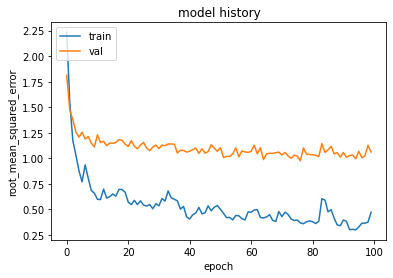

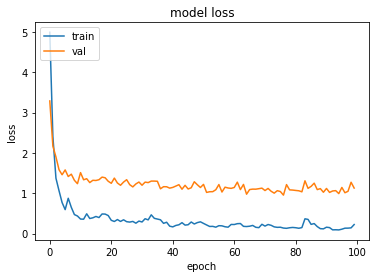

(1.0976223945617676, 1.2047749757766724)

In [7]:
fc_nn.evaluate()

# ConvNet

Configuration for NN:

In [8]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 1),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [9]:
from gaze_predictor.convolutional import ConvNetwork

conv_nn = ConvNetwork(name='conv_nn', configuration = nn_configuration, subject_specific=True)
conv_nn.create_model()

Created model for conv_nn:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 15, 20, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 10, 16)        0         
 )                                                               
                                                                 
 Conv2 (Conv2D)              (None, 8, 10, 32)         4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 Dense1 (Dense)            

Train Model:

In [10]:
conv_nn.train()

Epoch 1/100
137/137 [==============================] - 7s 5ms/step - loss: 5.9567 - root_mean_squared_error: 2.4406 - val_loss: 5.6654 - val_root_mean_squared_error: 2.3802
Epoch 2/100
137/137 [==============================] - 0s 4ms/step - loss: 5.0049 - root_mean_squared_error: 2.2372 - val_loss: 5.6018 - val_root_mean_squared_error: 2.3668
Epoch 3/100
137/137 [==============================] - 0s 4ms/step - loss: 4.2938 - root_mean_squared_error: 2.0721 - val_loss: 4.2467 - val_root_mean_squared_error: 2.0608
Epoch 4/100
137/137 [==============================] - 1s 4ms/step - loss: 3.2485 - root_mean_squared_error: 1.8024 - val_loss: 3.6223 - val_root_mean_squared_error: 1.9032
Epoch 5/100
137/137 [==============================] - 0s 4ms/step - loss: 2.4926 - root_mean_squared_error: 1.5788 - val_loss: 3.2645 - val_root_mean_squared_error: 1.8068
Epoch 6/100
137/137 [==============================] - 0s 4ms/step - loss: 1.9376 - root_mean_squared_error: 1.3920 - val_loss: 2.7416 

Evaluate Model:

43/43 [==============================] - 0s 2ms/step - loss: 1.6941 - root_mean_squared_error: 1.3016

Test root_mean_squared_error: 1.3015806674957275

Test loss: 1.6941121816635132


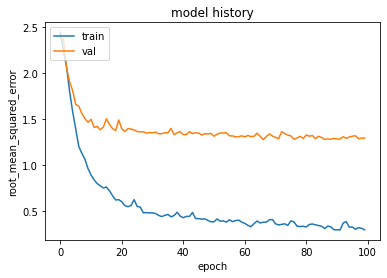

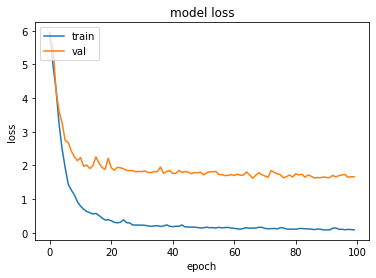

(1.3015806674957275, 1.6941121816635132)

In [11]:
conv_nn.evaluate()

# ConvNet 3D

Configuration for NN:

In [12]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'input_shape': (15, 20, 3),
    'n_output': 1  # number of outputs = x and y
}

Create Model:

In [13]:
from gaze_predictor.convolutional_3d import ConvNetwork3D

conv_nn_3d = ConvNetwork3D(name='conv_nn_3d', configuration = nn_configuration, subject_specific=True)
conv_nn_3d.create_model()

Created model for conv_nn_3d:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1_In (Conv2D)           (None, 15, 20, 12)        912       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 10, 12)        0         
 2D)                                                             
                                                                 
 Conv2 (Conv2D)              (None, 8, 10, 32)         3488      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                                 
 Dense1 (Dense)         

Train Model:

In [14]:
conv_nn_3d.train()

Epoch 1/100
137/137 [==============================] - 1s 5ms/step - loss: 6.0553 - root_mean_squared_error: 2.4608 - val_loss: 5.8423 - val_root_mean_squared_error: 2.4171
Epoch 2/100
137/137 [==============================] - 1s 4ms/step - loss: 5.3407 - root_mean_squared_error: 2.3110 - val_loss: 5.6025 - val_root_mean_squared_error: 2.3670
Epoch 3/100
137/137 [==============================] - 1s 4ms/step - loss: 4.8321 - root_mean_squared_error: 2.1982 - val_loss: 5.5974 - val_root_mean_squared_error: 2.3659
Epoch 4/100
137/137 [==============================] - 1s 4ms/step - loss: 3.9386 - root_mean_squared_error: 1.9846 - val_loss: 4.2096 - val_root_mean_squared_error: 2.0517
Epoch 5/100
137/137 [==============================] - 1s 4ms/step - loss: 3.1450 - root_mean_squared_error: 1.7734 - val_loss: 3.5516 - val_root_mean_squared_error: 1.8846
Epoch 6/100
137/137 [==============================] - 1s 4ms/step - loss: 2.3617 - root_mean_squared_error: 1.5368 - val_loss: 3.0651 

Evaluate Model:

43/43 [==============================] - 0s 2ms/step - loss: 1.3216 - root_mean_squared_error: 1.1496

Test root_mean_squared_error: 1.1496107578277588

Test loss: 1.3216049671173096


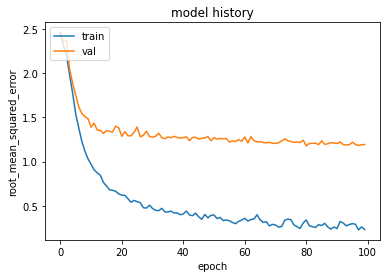

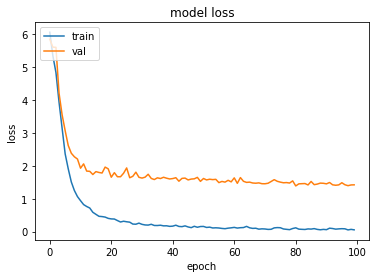

(1.1496107578277588, 1.3216049671173096)

In [15]:
conv_nn_3d.evaluate()

# Recurrent Network

Configuration for NN:

In [16]:
from tensorflow import keras

nn_configuration = {
    'epochs': epochs,  # number of epochs
    'batch_size': 32,  # size of the batch
    'verbose': 1,  # set the training phase as verbose
    'optimizer': keras.optimizers.Adam(clipvalue=1.0),  # optimizer
    'metrics': ["root_mean_squared_error"],
    'loss': 'mean_squared_error',  # loss
    'val_split': 0.2,  # validation split: percentage of the training data used for evaluating the loss function
    'n_input': 300,
    'input_shape': (300,),
    'n_output': 1  # number of outputs = mfd
}

Create Model:

In [17]:
from gaze_predictor.recurrent_network import RecurrentNetwork

lstm_nn = RecurrentNetwork(name='lstm_nn', configuration = nn_configuration, subject_specific=True)
lstm_nn.create_model()

FileNotFoundError: ignored

Train Model:

In [ ]:
lstm_nn.train()

Evaluate Model:

In [ ]:
lstm_nn.evaluate()

# Save Models

In [ ]:
# fc_nn.save_model()
# conv_nn.save_model()
# conv_nn_3d.save_model()
# fc_nn_dropout.save_model()
# fc_nn_batch_norm.save_model()
fc_nn_elu.save_model()

In [ ]:
!zip -r /content/file.zip /content
from google.colab import files
files.download("/content/file.zip")